In [1]:
import pandas as pd
from Network import RKMNetwork

/Users/laltman2/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Graph with 6 nodes and 8 edges
Graph with 12 nodes and 20 edges
  name  isWeight Anode Bnode
0  BV0         0    A0    V0
1  BV1         0    A0    V1
2  BH0         0    A0    H0
3  BH1         0    A0    H1
4  W00         1    V0    H0
5  W01         1    V0    H1
6  W10         1    V1    H0
7  W11         1    V1    H1


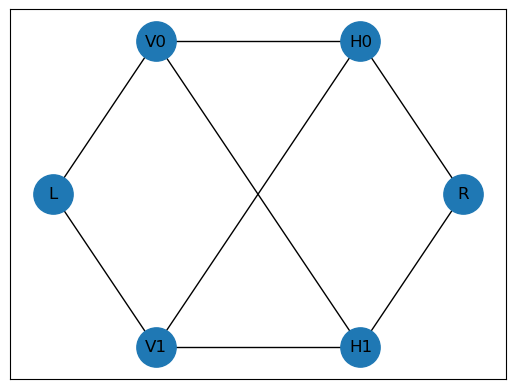

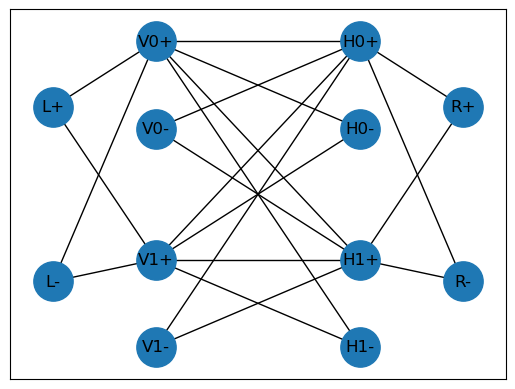

In [2]:
# create a network of size 2,2

rkm = RKMNetwork(2,2)

fig, ax = rkm.draw_network(full=False)
fig, ax = rkm.draw_network(full=True)

print(rkm.edge)

/Users/laltman2/anaconda3/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


(<Figure size 640x480 with 2 Axes>, <Axes: >)

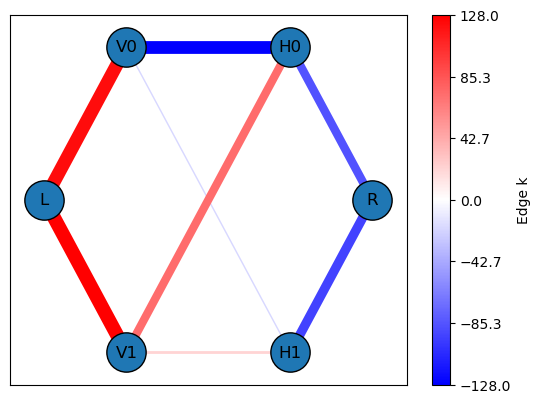

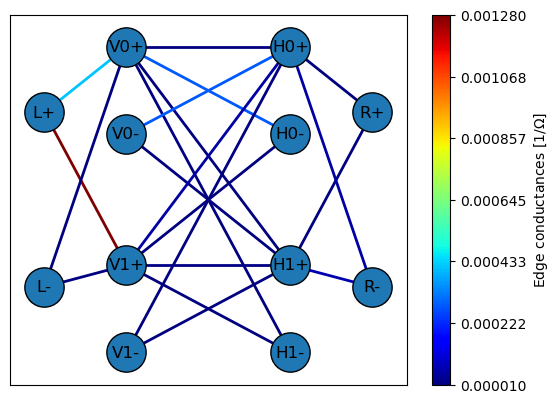

In [3]:
# draw simplified and full network with random k values

rkm.draw_network_state()

rkm.draw_fullnetwork_state()

In [4]:
print(dict(zip(rkm.edge.name, rkm.get_ks())))
fedgenames = []
for u,v,e in rkm.fullgraph.edges(data=True):
    name = e['name']
    if e['pm']:
        name += '+'
    else:
        name += '-'
    fedgenames.append(name)
print(dict(zip(fedgenames, rkm.get_conductances())))

{'BV0': 119, 'BV1': 125, 'BH0': -76, 'BH1': -84, 'W00': -115, 'W01': -13, 'W10': 74, 'W11': 25}
{'BV0+': 0.0001422222222222222, 'BV1+': 0.00042666666666666667, 'BV0-': 1e-05, 'BV1-': 1e-05, 'BH0+': 1e-05, 'BH1+': 1e-05, 'BH0-': 2.4615384615384616e-05, 'BH1-': 2.909090909090909e-05, 'W00+': 1e-05, 'W00-': 9.846153846153846e-05, 'W01+': 1e-05, 'W01-': 1.1130434782608696e-05, 'W10+': 2.3703703703703703e-05, 'W10-': 1e-05, 'W11+': 1.2427184466019418e-05, 'W11-': 1e-05}


/Users/laltman2/anaconda3/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


(<Figure size 640x480 with 2 Axes>, <Axes: >)

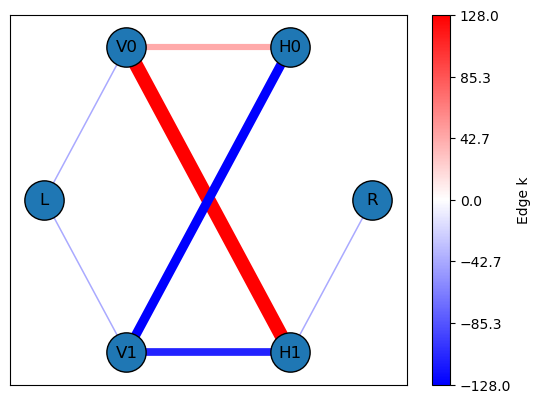

In [5]:
# load k values from data

df = pd.read_csv('problems/Dstate_anadigi.csv')
row = df.iloc[0]
rkm.load_state(row)

rkm.draw_network_state()

/Users/laltman2/anaconda3/lib/python3.10/site-packages/pyrkm/circuit_utils.py:42: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence_matrix = nx.incidence_matrix(self.graph, oriented=True)


{'L+': 3.0, 'L-': 1.0, 'R+': 3.0, 'R-': 1.0, 'V0+': 2.0039870824670625, 'V0-': 2.5000000000000004, 'V1+': 1.990643308268451, 'V1-': 2.5020408163265304, 'H0+': 3.0, 'H0-': 1.0, 'H1+': 2.0, 'H1-': 2.0}


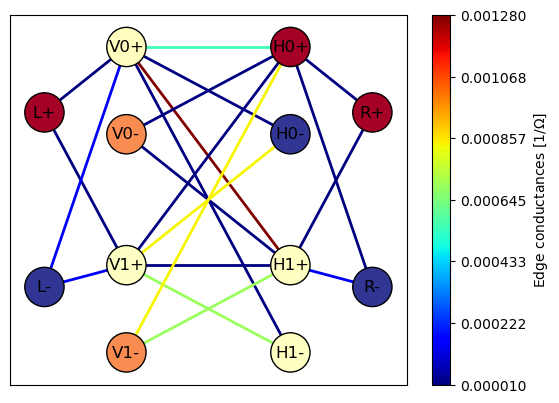

In [6]:
# clamp a forward state and solve the circuit

V = rkm.clamp_solve(FB=1, vals = [1,0], plot=True)

print(V)

In [7]:
# check that network structure check is correct

DA = [1, 1, 1, 1, 0, 0, 1, 1]
DB = [0, 1, 1, 0, 1, 0, 1, 0]
   
rkm.run_nodechecks(DA, DB)

True